<a href="https://colab.research.google.com/github/ViniciusMRod/MVP_Sprint01_PUC_Rio/blob/main/MVP_Sprint01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - Sprint 1 - Análise de Dados de Boas Práticas**

## Introdução:
Este projeto tem como objetivo analisar os dados do EPA Air Quality Data - Pollutants para identificar os horários do dia em que há maiores níveis de poluição do ar em Cambridge, Massachusetts, e gerar um modelo de aprendizado supervisionado para prever os dias e horários que terão maiores probabilidades de atingir valores acima dos aceitáveis na escala AQI. A qualidade do ar é um tema relevante, pois afeta a saúde e o bem-estar das pessoas. Além disso, a identificação dos horários com maiores níveis de poluição pode auxiliar na implementação de políticas públicas para melhorar a qualidade do ar e proteger a população.

O EPA Air Quality Data - Pollutants é um conjunto de dados coletados pelo Environmental Protection Agency (EPA) dos Estados Unidos. Esses dados são coletados de estações de monitoramento de qualidade do ar em todo o país. Este conjunto de dados em particular se concentra em vários poluentes atmosféricos que afetam a qualidade do ar, como dióxido de enxofre (SO2), monóxido de carbono (CO) e partículas em suspensão (PM2.5 e PM10). A análise desses dados pode ajudar a entender melhor a qualidade do ar em diferentes regiões e identificar tendências ao longo do tempo.

## Metadados:
O conjunto de dados possui 298.398 linhas e 15 colunas, com informações coletadas entre 1990 e 2021., com dados coletados em diferentes estações de monitoramento em Cambridge, Massachusetts. As colunas incluem informações sobre a data e hora da coleta de dados, o tipo de poluente atmosférico monitorado, a concentração do poluente e outras informações relevantes. Algumas das colunas do conjunto de dados incluem:

## Dicionário de dados:

* **Parameter Code**: O código AQS (Air Quality System) correspondente ao parâmetro (poluente) medido pelo monitor;
* **Parameter**: O nome ou descrição atribuído no AQS ao parâmetro medido pelo monitor;
* **Date**: data em que a medição foi realizada;
* **Site Name**: nome do local onde a medição foi realizada;
* **Sample Duration**: O tempo que o ar passa pelo dispositivo de monitoramento antes de ser medido;
* **Pollutant Standard**: Uma descrição das regras padrão de qualidade do ar ambiente usadas para agregar estatísticas;
* **Method**: Uma breve descrição dos processos, equipamentos e protocolos usados na coleta e medição da amostra;
* **Event Type**: Indica se os dados medidos durante eventos excepcionais (como um incêndio florestal) estão incluídos no resumo;
* **Observation Count**: O número de observações (amostras) coletadas durante o dia;
* **Observation Percent**: A porcentagem que representa o número de observações feitas em relação ao número programado para ser feito durante o dia;
* **Measurement Unit**: O valor médio (média aritmética) do dia;
* **Average**: média das medições do parâmetro no dia;
* **Daily Maximum**: valor máximo diário do parâmetro medido;
* **Hour of Maximum**: A hora (em um relógio de 24 horas) em que o valor mais alto do dia foi obtido;
* **AQI,**: Índice de Qualidade do Ar.

## *Objetivo: identificar os horários do dia em que há maiores níveis de poluição do ar em Cambridge, Massachusetts, a partir dos dados do conjunto de dados EPA Air Quality Data - Pollutants e gerar um modelo de aprendizado supervionado para prever os dias d0 ano e as horas que teram maiores probabilidades de atingir valores acima dos aceitaveis na escala AQI.*


- Este é um problema de análise exploratória de dados para responder a uma pergunta específica sobre os dados. Portanto, não se trata nem de aprendizado supervisionado, nem não supervisionado.
- Com base na pergunta que estamos tentando responder, a premissa é que a poluição do ar varia ao longo do dia e que há horários específicos em que os níveis de poluição são mais altos. Além disso, acredita-se que essa informação possa ser útil para melhorar a eficácia das leis de qualidade do ar na cidade de Cambridge, Massachusetts.
- As informações disponíveis indicam que os dados foram coletados em Cambridge, Massachusetts, nos Estados Unidos, entre 01 de janeiro de 1990 a 31 de dezembro de 2021. Portanto, os dados estão restritos a esse período e localização geográfica.


## Dando inicio a analise exploratória dos dados


In [6]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

**Fazendo a carga de dados**

In [7]:
# URLs dos arquivos CSV que compõem a base de dados
urls = [
    "https://raw.githubusercontent.com/ViniciusMRod/MVP_Sprint01_PUC_Rio/master/EPA_Air_Quality_Data_-_Parametro_88502.csv",
    "https://raw.githubusercontent.com/ViniciusMRod/MVP_Sprint01_PUC_Rio/master/EPA_Air_Quality_Data_-_Parametro_44201.csv",
    "https://raw.githubusercontent.com/ViniciusMRod/MVP_Sprint01_PUC_Rio/master/EPA_Air_Quality_Data_-_Parametro_81102.csv",
    "https://raw.githubusercontent.com/ViniciusMRod/MVP_Sprint01_PUC_Rio/master/EPA_Air_Quality_Data_-_Parametro_88101.csv",
    "https://raw.githubusercontent.com/ViniciusMRod/MVP_Sprint01_PUC_Rio/master/EPA_Air_Quality_Data_-_Parametro_42602.csv",
    "https://raw.githubusercontent.com/ViniciusMRod/MVP_Sprint01_PUC_Rio/master/EPA_Air_Quality_Data_-_Parametro_42101.csv",
    "https://raw.githubusercontent.com/ViniciusMRod/MVP_Sprint01_PUC_Rio/master/EPA_Air_Quality_Data_-_Parametro_42401.csv"
]

# Lista para armazenar os DataFrames lidos
dfs = []

# Loop para ler cada arquivo CSV e armazenar o DataFrame na lista dfs
for url in urls:
    # Ler o arquivo CSV e armazenar em um DataFrame
    df = pd.read_csv(url, sep=";")
    
    # Adicionar o DataFrame à lista
    dfs.append(df)

# Concatenar os DataFrames em um único DataFrame
df = pd.concat(dfs, axis=0, ignore_index=True)

Para mais detalhes sobre o data set pode ser acessado em: https://data.cambridgema.gov/Energy-and-the-Environment/EPA-Air-Quality-Data-Pollutants/43k6-pjtt

## Análise Exploratória dos dados

In [8]:
# Imprimir as primeiras linhas do DataFrame
df.head(10)

,Parameter Code,Parameter,Date,Site Name,Sample Duration,Pollutant Standard,Method,Event Type,Observation Count,Observation Percent,Measurement Unit,Average,Daily Maximum,Hour of Maximum,AQI
0,88502,Acceptable PM2.5 AQI & Speciation Mass,12/12/1999,DUDLEY SQUARE ROXBURY,1 HOUR,NaN,PM2.5 SSI w/No Correction Factor - TEOM Gravim...,None,24,100,Micrograms/cubic meter (LC),5020833,93,21,NaN
1,88502,Acceptable PM2.5 AQI & Speciation Mass,11/12/1999,DUDLEY SQUARE ROXBURY,1 HOUR,NaN,PM2.5 SSI w/No Correction Factor - TEOM Gravim...,None,24,100,Micrograms/cubic meter (LC),5375,3,16,NaN
2,88502,Acceptable PM2.5 AQI & Speciation Mass,10/12/1999,DUDLEY SQUARE ROXBURY,1 HOUR,NaN,PM2.5 SSI w/No Correction Factor - TEOM Gravim...,None,24,100,Micrograms/cubic meter (LC),10825,184,9,NaN
3,88502,Acceptable PM2.5 AQI & Speciation Mass,09/12/1999,DUDLEY SQUARE ROXBURY,1 HOUR,NaN,PM2.5 SSI w/No Correction Factor - TEOM Gravim...,None,24,100,Micrograms/cubic meter (LC),10504167,176,10,NaN
4,88502,Acceptable PM2.5 AQI & Speciation Mass,08/12/1999,DUDLEY SQUARE ROXBURY,1 HOUR,NaN,PM2.5 SSI w/No Correction Factor - TEOM Gravim...,None,24,100,Micrograms/cubic meter (LC),6270833,14,20,NaN
5,88502,Acceptable PM2.5 AQI & Speciation Mass,07/12/1999,DUDLEY SQUARE ROXBURY,1 HOUR,NaN,PM2.5 SSI w/No Correction Factor - TEOM Gravim...,None,24,100,Micrograms/cubic meter (LC),3079167,75,8,NaN
6,88502,Acceptable PM2.5 AQI & Speciation Mass,06/12/1999,DUDLEY SQUARE ROXBURY,1 HOUR,NaN,PM2.5 SSI w/No Correction Factor - TEOM Gravim...,None,24,100,Micrograms/cubic meter (LC),12670833,181,19,NaN
7,88502,Acceptable PM2.5 AQI & Speciation Mass,05/12/1999,DUDLEY SQUARE ROXBURY,1 HOUR,NaN,PM2.5 SSI w/No Correction Factor - TEOM Gravim...,None,24,100,Micrograms/cubic meter (LC),14825,184,22,NaN
8,88502,Acceptable PM2.5 AQI & Speciation Mass,04/12/1999,DUDLEY SQUARE ROXBURY,1 HOUR,NaN,PM2.5 SSI w/No Correction Factor - TEOM Gravim...,None,24,100,Micrograms/cubic meter (LC),18658333,271,9,NaN
9,88502,Acceptable PM2.5 AQI & Speciation Mass,03/12/1999,DUDLEY SQUARE ROXBURY,1 HOUR,NaN,PM2.5 SSI w/No Correction Factor - TEOM Gravim...,None,23,96,Micrograms/cubic meter (LC),12491304,171,18,NaN


In [9]:
# Mostra as 10 últimas linhas do dataset
df.tail(10)

,Parameter Code,Parameter,Date,Site Name,Sample Duration,Pollutant Standard,Method,Event Type,Observation Count,Observation Percent,Measurement Unit,Average,Daily Maximum,Hour of Maximum,AQI
298127,42401,Sulfur dioxide,10/01/2021,DUDLEY SQUARE ROXBURY,5 MINUTE,NaN,Instrumental - Ultraviolet Fluorescence API 10...,None,266,92,Parts per billion,238722,1,20,NaN
298128,42401,Sulfur dioxide,09/01/2021,DUDLEY SQUARE ROXBURY,5 MINUTE,NaN,Instrumental - Ultraviolet Fluorescence API 10...,None,288,100,Parts per billion,210417,3,8,NaN
298129,42401,Sulfur dioxide,08/01/2021,DUDLEY SQUARE ROXBURY,5 MINUTE,NaN,Instrumental - Ultraviolet Fluorescence API 10...,None,288,100,Parts per billion,219792,4,7,NaN
298130,42401,Sulfur dioxide,07/01/2021,DUDLEY SQUARE ROXBURY,5 MINUTE,NaN,Instrumental - Ultraviolet Fluorescence API 10...,None,240,83,Parts per billion,21375,4,4,NaN
298131,42401,Sulfur dioxide,06/01/2021,DUDLEY SQUARE ROXBURY,5 MINUTE,NaN,Instrumental - Ultraviolet Fluorescence API 10...,None,246,85,Parts per billion,17561,5,10,NaN
298132,42401,Sulfur dioxide,05/01/2021,DUDLEY SQUARE ROXBURY,5 MINUTE,NaN,Instrumental - Ultraviolet Fluorescence API 10...,None,288,100,Parts per billion,192014,4,14,NaN
298133,42401,Sulfur dioxide,03/01/2021,DUDLEY SQUARE ROXBURY,5 MINUTE,NaN,Instrumental - Ultraviolet Fluorescence API 10...,None,288,100,Parts per billion,155556,5,11,NaN
298134,42401,Sulfur dioxide,02/01/2021,DUDLEY SQUARE ROXBURY,5 MINUTE,NaN,Instrumental - Ultraviolet Fluorescence API 10...,None,288,100,Parts per billion,190278,4,10,NaN
298135,42401,Sulfur dioxide,01/01/2021,DUDLEY SQUARE ROXBURY,5 MINUTE,NaN,Instrumental - Ultraviolet Fluorescence API 10...,None,266,92,Parts per billion,146992,4,0,NaN
298136,42401,Sulfur dioxide,04/01/2021,DUDLEY SQUARE ROXBURY,5 MINUTE,NaN,Instrumental - Ultraviolet Fluorescence API 10...,None,266,92,Parts per billion,194361,4,13,NaN


In [10]:
# Verificando mais informações sobre os tipos de dados do data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298137 entries, 0 to 298136
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Parameter Code       298137 non-null  int64  
 1   Parameter            298137 non-null  object 
 2   Date                 298137 non-null  object 
 3   Site Name            296317 non-null  object 
 4   Sample Duration      298137 non-null  object 
 5   Pollutant Standard   271770 non-null  object 
 6   Method               298137 non-null  object 
 7   Event Type           298137 non-null  object 
 8   Observation Count    298137 non-null  int64  
 9   Observation Percent  298137 non-null  int64  
 10  Measurement Unit     298137 non-null  object 
 11  Average              298137 non-null  int64  
 12  Daily Maximum        298137 non-null  int64  
 13  Hour of Maximum      298137 non-null  int64  
 14  AQI                  217185 non-null  float64
dtypes: float64(1), in

Podemos concluir que o conjunto de dados possui 298.137 instâncias (linhas) e 15 atributos (colunas). Os tipos de dados dos atributos incluem inteiros, floats (decimais) e objetos (strings).

A coluna "Date" contém informações sobre a data da medição da qualidade do ar, mas seu tipo de dados é objeto (string), o que pode ser um problema caso seja necessário realizar operações de manipulação de data. Além disso, há valores ausentes em algumas colunas, como "Site Name" e "Pollutant Standard", onde há  1820 e 26367 dados faltantes respectivamente.
Na coluna "AQI", que é a nossa variável alvo, possui um total de 217.185 valores não nulos, ou seja, 80.952 dados faltantes.

Posteriormente esses valores serão analisados com mais cuidado e decidir como tratá-los.


### Avaliando os valores discrepantes ou inconsistentes 

In [11]:
# Selecionar apenas os atributos numéricos
df_numerical = df.select_dtypes(include=['int64', 'float64'])

# Exibir o resumo estatístico
df_numerical.describe().round(2)

,Parameter Code,Observation Count,Observation Percent,Average,Daily Maximum,Hour of Maximum,AQI
count,298137.00,298137.00,298137.00,298137.00,298137.00,298137.00,217185.00
mean,59042.99,16.50,98.09,2776235.46,53.83,8.75,25.82
std,21711.94,29.81,5.31,7043984.40,89.44,8.60,18.00
min,42101.00,1.00,4.00,-7363636.00,-119.00,0.00,0.00
25%,42401.00,1.00,100.00,62.00,9.00,0.00,13.00
50%,42602.00,21.00,100.00,3625.00,28.00,7.00,24.00
75%,88101.00,24.00,100.00,495833.00,61.00,17.00,36.00
max,88502.00,288.00,100.00,96889474.00,2906.00,23.00,172.00


Começamos a analisar pelo "Observation Count", onde podemos notar o valor máximo de 288 contagens, no caso, medições ou coletas de amostras durante um dia e isso pode indicar um erro que deve ser tratado posteriomente. O "Observation Percent" onde mostra o percentual de amostragens feitas durante o dia frente ao que é programado para o dia. Nele podemos ver um valor mínimo de 4%, algo a ser investigado porteriormente para verificar se isso não poderia afetar o universo de amostras do parâmetro em questão. 

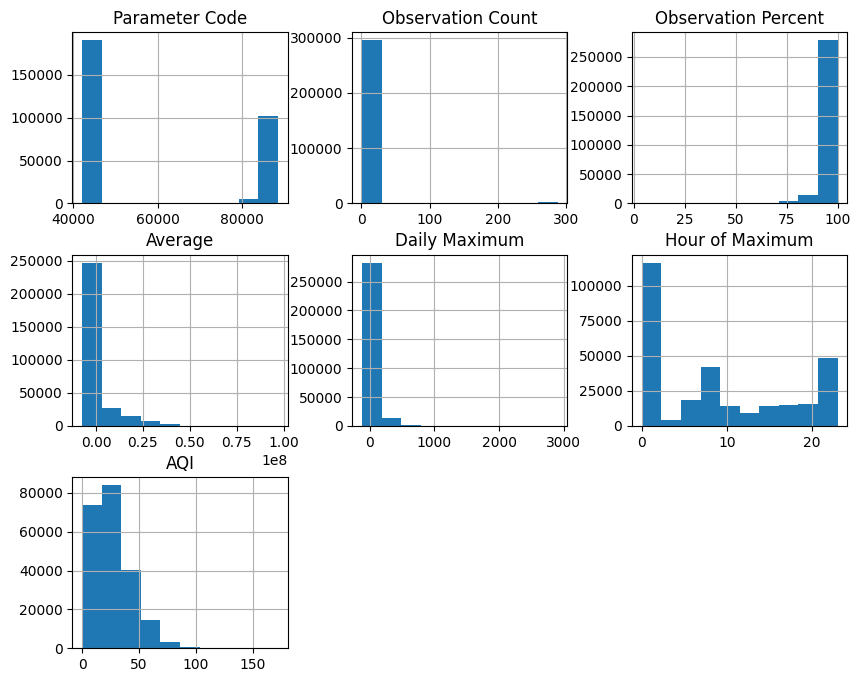

In [21]:
# Histograma
df.hist(figsize = (10,8))
plt.show()

Nos histogramas podemos algumas informações logo de cara. Em Observation Count podemos entender que a contagem de amostras foram feitas em sua maior parte de 1 a 24 amostragens por dia, com uma pequena quantidade de amostras feitas cerca de 288 vezes ao dia (provavelmente feitas mais de uma vez por hora).

O histograma de Observation Percent	também mostra a maior parte das observações com a sua porcentagem completa de amostragens por dia. Já o histograma de Average (média) mostra que a maioria das médias das concentracões do dia estão um pouco abaixo de zero, o que se traduz em boas 

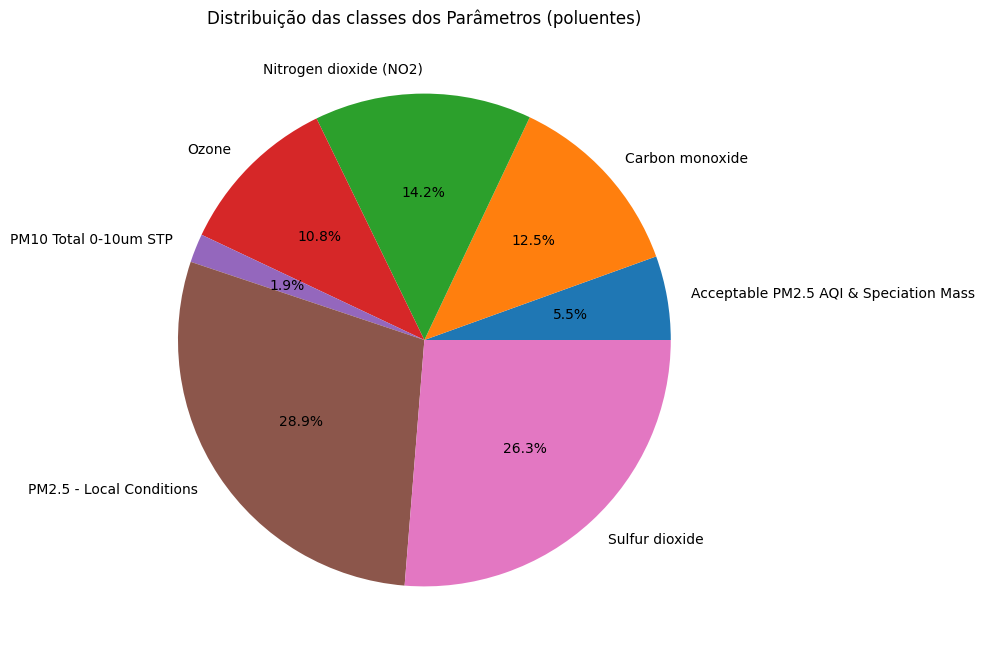

In [18]:
# Verifica a distribuição das classes de parâmetros no data set
# Agrupa as informações e calculando as proporções relativas
grouped = df.groupby('Parameter').size()
proportions = grouped/grouped.sum()

# Plota o gráfico de pizza com as proporções de cada classe
plt.figure(figsize=(8,8))
proportions.plot.pie(autopct='%1.1f%%', labels=grouped.index)
plt.ylabel('')
plt.title('Distribuição das classes dos Parâmetros (poluentes)')
plt.show()

A quantidade dos poluentes dióxido de enxofre (SO2) (28.9%) e partículas em suspensão (PM2.5) (26.3%) para condições locais são visivelmente as classes com maiores observações no data set.